In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from __future__ import division

In [2]:
F = lambda x: 1-m.exp(-x)

In [3]:
Fn = lambda y,X:len([x for x in X if x<=y])/len(X)

In [4]:
def KS(X,F):
    n = len(X)
    Xi = sorted(X)
    Dn = []
    for i in range(n):
        Dn.append(max((i+1)/n-F(Xi[i]),F(Xi[i])-i/n))
    D = max(Dn)
    K = np.argmax(Dn)
    Femp = [Fn(x,X) for x in np.arange(min(X),max(X)+0.02,0.01)]
    F0 = [F(x) for x in np.arange(min(X),max(X)+0.02,0.01)]
    P = plt.plot(np.arange(min(X),max(X)+0.02,0.01),Femp,
            np.arange(min(X),max(X)+0.02,0.01),F0,
            Xi[K],F(Xi[K]),'g^')
    print D
    return D,P

0.128518040933


(0.12851804093299124,
  <matplotlib.lines.Line2D at 0x7fdc2c61efd0>])

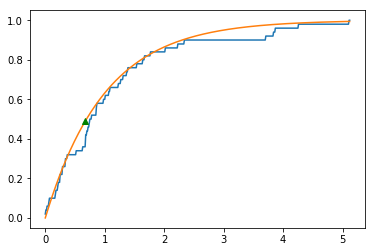

In [5]:
KS(np.random.exponential(1,50),F)

In [6]:
Funciones = [lambda x: 1-m.exp(-x),lambda x: 1-m.exp(-1/2*x),
            lambda x: 1-m.exp(-1/3*x),lambda x: 1-m.exp(-1/4*x)]

0.739664716763
0.507120558829
0.361582880967
0.268469340287


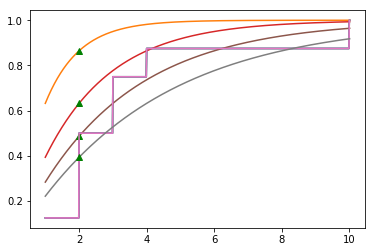

In [7]:
X = [2,3,10,2,4,1,2,3]
for F in Funciones:
    KS(X,F)

In [8]:
theta = 1/np.mean(X)

In [10]:
theta

0.2962962962962963

0.322107998721


(0.32210799872119744,
  <matplotlib.lines.Line2D at 0x7fdc2c45fc90>])

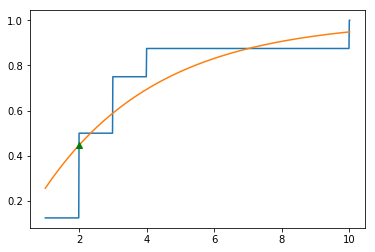

In [11]:
KS(X,lambda x: 1-m.exp(-x*theta))